# NYCDSA Machine Learning Project - House Prices

# Step 4. GBM with FA components

---
## Project Description

For this project, the goal task is to employ machine learning techniques to understand what factors contribute to house values.

### Project Outline
- Step 1. Exploratory data analysis & Imputation
- Step 2. Gradient boosting model & Feature selection
- Step 3. Factor analysis of the features
- Step 4. Gradient boosting model with factors

In [5]:
import pandas as pd
import numpy as np
import seaborn as sn
import xgboost as xgb
import sklearn.model_selection as ms

from datetime import datetime
from scipy import stats
from matplotlib import pyplot as plt
from xgboost import plot_importance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

In [6]:
%store -r y
%store -r X_famd_train

In [7]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [8]:
X = X_famd_train.copy()
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.698665,-0.135360,-0.206162,0.005061,-0.266903,-0.261252,-0.803002,0.373249,0.028297,0.299413,-0.321504,0.155487,0.041968,-0.066432,-0.164880,0.402710,0.013068,-0.122990,0.001888,-0.011491,-0.073098,0.051506,-0.150096,-0.061943,0.050973,0.030916,-0.064377,-0.001464
1,0.315534,-0.200566,1.364817,-0.690204,0.837214,0.243685,0.228956,0.275519,-0.182796,0.188329,0.401765,0.443768,0.214076,0.029312,-0.375790,-0.546426,0.220385,0.427809,-0.320168,0.335426,0.088689,0.084726,-0.182036,0.105690,-0.045202,0.013213,0.085827,0.005584
2,0.891414,-0.079454,-0.109483,-0.112726,-0.378562,-0.130670,-0.495033,0.141487,-0.192889,0.038041,0.207911,-0.003120,0.288524,-0.290660,-0.030155,0.163068,0.105910,-0.062201,-0.019103,0.086452,-0.030959,0.056497,0.221417,0.009039,-0.044690,0.040662,-0.087994,0.002919
3,-0.159654,0.135467,0.209564,0.325676,-0.628336,-0.645196,0.314819,-0.192392,0.304851,-0.704605,0.278504,-0.132512,-0.090422,-0.158386,-0.131140,0.045776,-0.163549,-0.355800,0.449302,0.111966,0.305669,-0.257337,0.075338,-0.472252,0.001761,-0.017873,0.281894,-0.013000
4,1.407000,0.363549,0.130155,-0.056024,-0.663868,-0.061720,-0.344755,0.258438,-0.013225,-0.104777,-0.114411,0.220239,0.292665,-0.227194,-0.226427,-0.100678,0.130746,-0.203861,0.302681,0.155691,-0.099463,-0.002670,-0.074796,-0.020891,0.026924,0.106995,-0.025887,-0.001542


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#dmatrix = xgb.DMatrix(data=X,label=y)

In [10]:
# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 2, 5, 10],
    'gamma': [0, 1, 2, 5],
    'reg_alpha': [0],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'random_state' :[1]
}

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',nthread= -1,gpu_id=-1)

In [14]:
folds = 5
param_comb = 100

random_search1 = RandomizedSearchCV(
    xg_reg, 
    param_distributions=params, 
    n_iter=param_comb, 
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1, 
    cv=folds, 
    verbose=4
)

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search1.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished



 Time taken: 0 hours 3 minutes and 43.42 seconds.


In [15]:
print('\n All results:')
print(random_search1.cv_results_)
print('\n\n Best estimator:')
print(random_search1.best_estimator_)
print('\n\n Best rmse %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(-random_search1.best_score_)
print('\n\n Best R_squared %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(r2_score(y, random_search1.predict(X)))
print('\n\n Best hyperparameters:')
print(random_search1.best_params_)
results1 = pd.DataFrame(random_search1.cv_results_).sort_values('rank_test_score', ascending=True)
results1.to_csv('xgb-random-grid-search-results-train_famd01.csv', index=False)


 All results:
{'mean_fit_time': array([1.46011624, 1.69509392, 1.47505531, 1.19640903, 0.80639586,
       0.70287991, 2.19766359, 1.59008207, 3.08733172, 2.98904853,
       2.86087308, 1.63371224, 2.0833312 , 1.22509608, 2.22110744,
       2.1495841 , 0.85159283, 1.65145125, 0.95444059, 1.83580542,
       1.87575088, 1.54766665, 0.66896796, 3.33400483, 1.4741406 ,
       1.30716395, 2.18361282, 1.91369233, 5.4270318 , 2.80991096,
       0.7415318 , 0.99119167, 1.26627107, 4.47435613, 4.22140517,
       1.31590357, 1.41799321, 1.07740359, 1.21235285, 1.7854784 ,
       1.1687007 , 1.47084684, 2.44903383, 1.22512116, 1.62801518,
       0.57158427, 1.8017684 , 1.03158998, 1.77274637, 2.12042961,
       0.91398258, 1.04953203, 3.1208406 , 1.94937835, 2.19564652,
       0.51600294, 1.83569908, 1.40610023, 2.71245775, 1.07786422,
       1.52988272, 0.7279923 , 1.71325207, 1.85464554, 1.57453384,
       0.63508039, 0.76016073, 1.6899786 , 2.70997782, 2.5469584 ,
       1.41621251, 1.36573486



Best Train R_squared 5-fold search with 100 parameter combinations:
0.9763589570707726


Best Test R_squared 5-fold search with 100 parameter combinations:
0.8851532581371891


Best R_squared 5-fold search with 100 parameter combinations:
0.9572186212869147


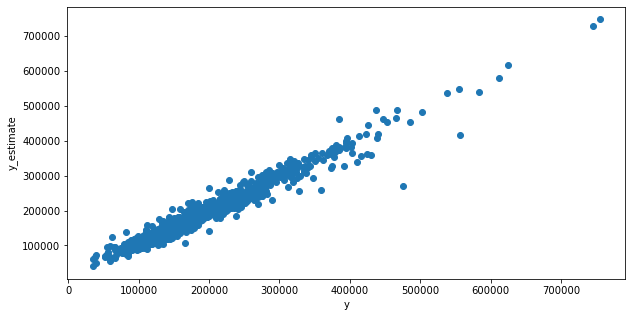

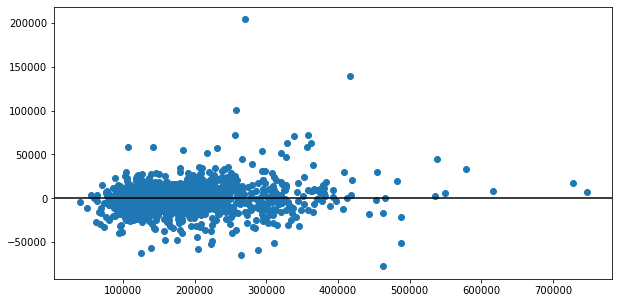

In [16]:
print('\n\nBest Train R_squared %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(r2_score(y_train, random_search1.predict(X_train)))
print('\n\nBest Test R_squared %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(r2_score(y_test, random_search1.predict(X_test)))
print('\n\nBest R_squared %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(r2_score(y, random_search1.predict(X)))

plt.rcParams['figure.figsize'] = [10, 5]

plt.scatter(y,random_search1.predict(X))
plt.xlabel('y')
plt.ylabel('y_estimate')
plt.show()

plt.scatter(random_search1.predict(X),y-random_search1.predict(X))
plt.axhline(color='black')
plt.show()

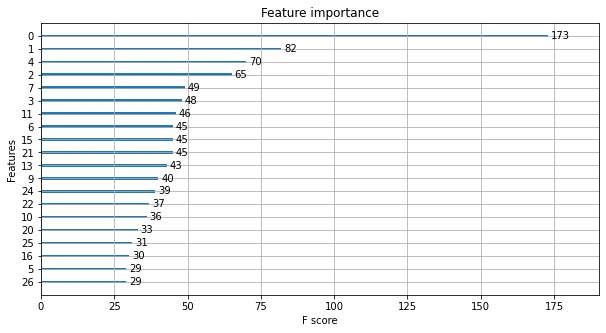

In [17]:
# plot feature importance
plt.rcParams['figure.figsize'] = [10, 5]
plot_importance(random_search1.best_estimator_,max_num_features=20)
plt.show()

In [19]:
feature_importance1 = pd.DataFrame(X.columns)
feature_importance1.columns = ['Features']
feature_importance1['ImportanceGain'] = random_search1.best_estimator_.feature_importances_
feature_importance1 = feature_importance1.sort_values('ImportanceGain', ascending=False)
feature_importance1['CummulativeGain'] = feature_importance1.ImportanceGain.cumsum()
feature_importance1

,Features,ImportanceGain,CummulativeGain
0,0,0.276810,0.276810
4,4,0.094258,0.371068
8,8,0.073478,0.444547
1,1,0.061730,0.506277
3,3,0.042921,0.549197
5,5,0.036026,0.585224
27,27,0.034938,0.620161
17,17,0.030527,0.650688
23,23,0.030078,0.680766
9,9,0.029747,0.710513


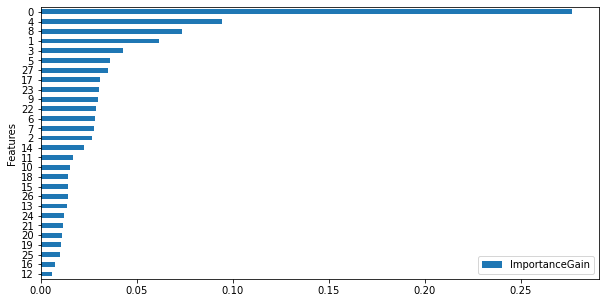

In [20]:
feature_importance1 = feature_importance1.sort_values('ImportanceGain', ascending=False)
feature_importance1.sort_values('ImportanceGain', ascending=True).plot(x='Features',y='ImportanceGain',kind='barh')
plt.show()